In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
from google.colab import files
uploaded = files.upload()

microsoft_df  = pd.read_csv(
    "microsoft_Stock.csv")

display(microsoft_df.head())
display(microsoft_df.tail())

Saving microsoft_Stock.csv to microsoft_Stock.csv


,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2010-01-04,MSFT,30.62,31.10,30.59,30.95,38414184,USD
1,2010-01-05,MSFT,30.85,31.10,30.64,30.96,49758864,USD
2,2010-01-06,MSFT,30.88,31.08,30.52,30.77,58182332,USD
3,2010-01-07,MSFT,30.63,30.70,30.19,30.45,50564284,USD
4,2010-01-08,MSFT,30.28,30.88,30.24,30.66,51201288,USD


,Date,TICKER,Open,High,Low,Close,Volume,Currency
3186,2022-08-29,MSFT,265.85,267.40,263.85,265.23,20338544,USD
3187,2022-08-30,MSFT,266.67,267.05,260.66,262.97,20793554,USD
3188,2022-08-31,MSFT,264.86,267.08,261.39,261.47,24069784,USD
3189,2022-09-01,MSFT,258.69,260.77,255.43,260.40,22911262,USD
3190,2022-09-02,MSFT,261.41,264.71,254.48,256.06,22481832,USD


In [4]:
prophet_df = microsoft_df[['Date', 'Close']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpverci0f9/_ishloox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpverci0f9/z2hrjf2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9769', 'data', 'file=/tmp/tmpverci0f9/_ishloox.json', 'init=/tmp/tmpverci0f9/z2hrjf2e.json', 'output', 'file=/tmp/tmpverci0f9/prophet_modelga6jcmau/prophet_model-20230721025413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:54:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future_dates = model.make_future_dataframe(periods= 2000, freq='D')

In [6]:
forecast = model.predict(future_dates)

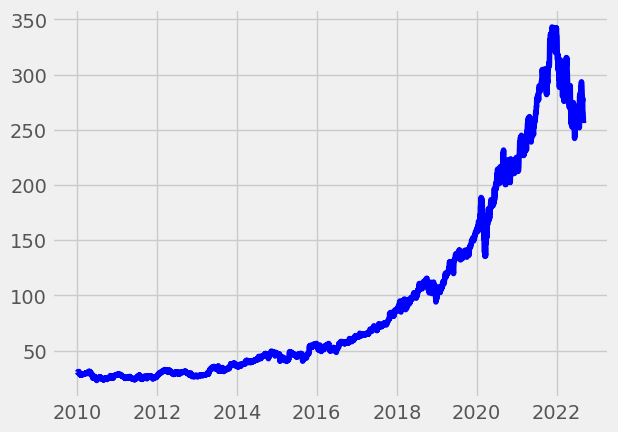

In [7]:
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


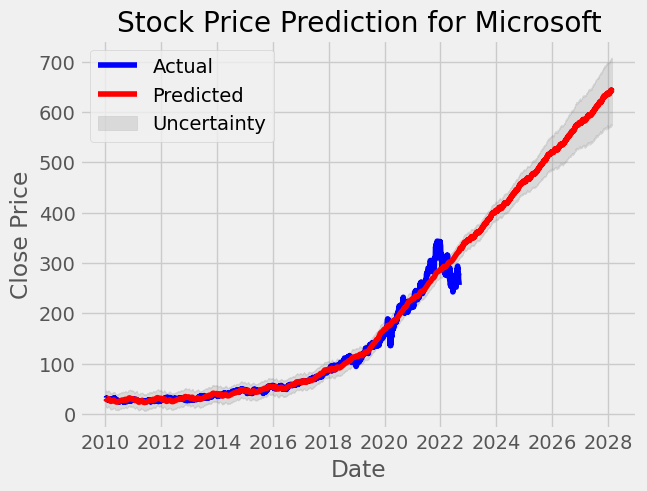

In [8]:

plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')


plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Microsoft')
plt.legend()
plt.show()